# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df = pd.read_csv('Dataset_inisiasi.csv')
print("Data awal:")
df.head()

Data awal:


,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Weather_Condition,Cluster
0,10.387580,1796.057415,1060.486382,14.653083,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6.0,93.895372,Fish Carrier,Short-haul,Steam Turbine,Good,Rough,0.0
1,20.749747,1648.556685,658.874144,7.199261,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9.0,96.218244,Container Ship,Long-haul,Diesel,Fair,Moderate,0.0
2,21.055102,915.261795,1126.822519,11.789063,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1.0,66.193698,Bulk Carrier,Transoceanic,Steam Turbine,Fair,Moderate,0.0
3,13.742777,1089.721803,1445.281159,9.727833,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8.0,80.008581,Fish Carrier,Transoceanic,Diesel,Fair,Moderate,0.0
4,18.616196,2171.646567,723.304215,14.916320,1912.509751,184569.045384,776698.354849,47.476155,1.370206,1.437725,7.0,53.174898,Fish Carrier,Long-haul,Heavy Fuel Oil (HFO),Fair,Rough,0.0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [3]:
# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['Cluster'])
y = df['Cluster']

In [4]:
# Separate the dataset into based on the numerical and categorical features
object_df = df.select_dtypes(include='object').columns.tolist()
numeric_df = df.select_dtypes(exclude='object').columns.tolist()[:-1]

In [5]:
# Encoding fitur kategorikal
le = LabelEncoder()
categorical_cols = X.select_dtypes(include='object').columns
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

In [6]:
# Scaling fitur numerik
scaler = StandardScaler()
numerical_cols = X.select_dtypes(include='number').columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [7]:
numeric_cols = df.select_dtypes(exclude='object').columns.tolist()

# Pisahkan cluster dari kolom numerik lainnya
if 'Cluster' in numeric_cols:
    numeric_cols.remove('Cluster')

# Isi nilai yang hilang pada kolom numerik dengan rata-rata
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)

# Isi nilai yang hilang pada kolom 'cluster' dengan modus
if df['Cluster'].isnull().sum() > 0:
    df['Cluster'].fillna(df['Cluster'].mode()[0], inplace=True)

In [8]:
# Split data menjadi data latih dan uji (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [9]:
# Periksa distribusi kelas
print("Distribusi kelas pada data latih:")
print(y_train.value_counts())
print("Distribusi kelas pada data uji:")
print(y_test.value_counts())

Distribusi kelas pada data latih:
Cluster
 0.0    1451
-1.0      28
 1.0       9
Name: count, dtype: int64
Distribusi kelas pada data uji:
Cluster
 0.0    623
-1.0     12
 1.0      4
Name: count, dtype: int64


In [10]:
# Check all train data is clean
X_train.isna().sum().sum(), X_test.isna().sum().sum()

(np.int64(0), np.int64(0))

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [11]:
# Terapkan SMOTE untuk oversampling
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

### Random Forest

In [12]:
# Latih model Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

### Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi model Decision Tree
model_dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')

In [14]:
# Latih model
model_dt.fit(X_train_res, y_train_res)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

Alasan Pemilihan:
- Random Forest dipilih karena kemampuannya menangani data non-linear dan mengurangi risiko overfitting dibandingkan model sederhana seperti Logistic Regression atau Decision Tree tunggal.
- Decision Tree dipilih karena kemampuannya menangkap hubungan non-linear, meskipun rentan terhadap overfitting jika tidak diatur.
- SMOTE digunakan untuk menyeimbangkan kelas dengan membuat sampel sintetis dari kelas minoritas, sehingga model dapat belajar lebih baik.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [15]:
# Fungsi evaluasi
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, f1, cm

### Random Forest

In [16]:
# Evaluasi model
acc_rf, prec_rf, rec_rf, f1_rf, cm_rf = evaluate_model(model_rf, X_test, y_test)

In [17]:
# Evaluasi model Random Forest
df_evaluation = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Random Forest": [acc_rf, prec_rf, rec_rf, f1_rf]
})

df_evaluation.style.set_caption("Evaluasi Model Random Forest")

,Metric,Random Forest
0,Accuracy,0.970266
1,Precision,0.961910
2,Recall,0.970266
3,F1-Score,0.962433


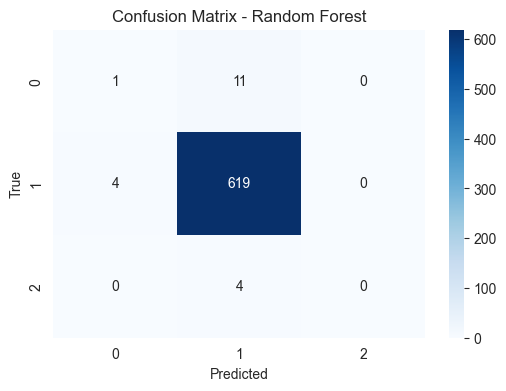

In [18]:
# Visualisasi Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Decision Tree

In [19]:
# Evaluasi model
acc_dt, prec_dt, rec_dt, f1_dt, cm_dt = evaluate_model(model_dt, X_test, y_test)

In [20]:
# Evaluasi model Decision Tree
df_evaluation = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Decision Tree": [acc_dt, prec_dt, rec_dt, f1_dt]
})

df_evaluation.style.set_caption("Evaluasi Model Decision Tree")

,Metric,Decision Tree
0,Accuracy,0.956182
1,Precision,0.967444
2,Recall,0.956182
3,F1-Score,0.958302


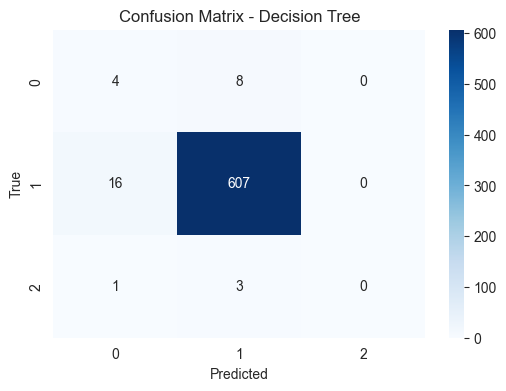

In [21]:
# Visualisasi Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [22]:
# Membuat DataFrame hasil evaluasi
df_comparison = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Random Forest": [acc_rf, prec_rf, rec_rf, f1_rf],
    "Decision Tree": [acc_dt, prec_dt, rec_dt, f1_dt]
})

# Menampilkan DataFrame
df_comparison.style.set_caption("Perbandingan Evaluasi Model Random Forest dan Decision Tree")

,Metric,Random Forest,Decision Tree
0,Accuracy,0.970266,0.956182
1,Precision,0.961910,0.967444
2,Recall,0.970266,0.956182
3,F1-Score,0.962433,0.958302


Hasil evaluasi awal menunjukkan bahwa Random Forest memiliki performa lebih baik dibandingkan Decision Tree, dengan accuracy 97,03% vs. 95,62% serta F1-score 96,24% vs. 95,83%. Namun, precision Decision Tree lebih tinggi (96,74%) dibandingkan Random Forest (95,56%), menunjukkan kemampuannya dalam menghindari false positive. Evaluasi ini masih menggunakan parameter default, sehingga perlu dilakukan hyperparameter tuning untuk mengoptimalkan performa model.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

### Random Forest

In [23]:
# Parameter grid untuk Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [24]:
from sklearn.model_selection import GridSearchCV

# GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1_weighted')

In [25]:
# Model terbaik
best_model_rf = grid_search.best_estimator_
print("Hyperparameter terbaik:", grid_search.best_params_)

Hyperparameter terbaik: {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 300}


### Decision Tree

In [26]:
# Parameter grid untuk Decision Tree
param_grid_dt = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [27]:
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='f1_weighted')
grid_search_dt.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1_weighted')

In [28]:
# Model terbaik
best_model_dt = grid_search_dt.best_estimator_
print("Hyperparameter terbaik (Decision Tree):", grid_search_dt.best_params_)

Hyperparameter terbaik (Decision Tree): {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

### Random Forest Tuned

In [29]:
# Evaluasi model setelah tuning
acc_rf_tuned, prec_rf_tuned, rec_rf_tuned, f1_rf_tuned, cm_rf_tuned = evaluate_model(best_model_rf, X_test, y_test)

In [30]:
# Evaluasi model Random Forest Setelah Tuning
df_evaluation = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Random Forest": [acc_rf_tuned, prec_rf_tuned, rec_rf_tuned, f1_rf_tuned]
})

df_evaluation.style.set_caption("Evaluasi Model Random Forest Setelah Tuning")

,Metric,Random Forest
0,Accuracy,0.971831
1,Precision,0.962885
2,Recall,0.971831
3,F1-Score,0.963358


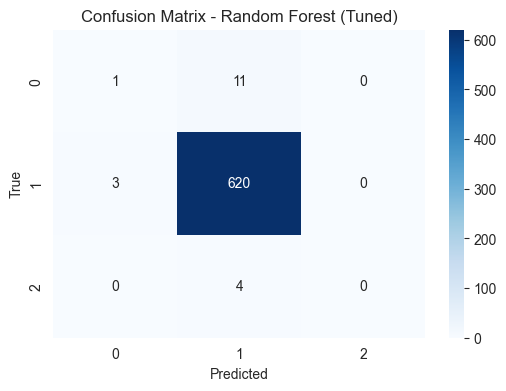

In [31]:
# Visualisasi Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf_tuned, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Decision Tree Tuned

In [32]:
# Evaluasi model setelah tuning
acc_dt_tuned, prec_dt_tuned, rec_dt_tuned, f1_dt_tuned, cm_dt_tuned = evaluate_model(best_model_dt, X_test, y_test)

In [33]:
# Evaluasi model Decision Tree
df_evaluation = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Decision Tree": [acc_dt_tuned, prec_dt_tuned, rec_dt_tuned, f1_dt_tuned]
})

df_evaluation.style.set_caption("Evaluasi Model Decision Tree Tuned")

,Metric,Decision Tree
0,Accuracy,0.956182
1,Precision,0.967444
2,Recall,0.956182
3,F1-Score,0.958302


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

In [34]:
df_evaluation = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Random Forest (Baseline)": [acc_rf, prec_rf, rec_rf, f1_rf],
    "Random Forest (Tuned)": [acc_rf_tuned, prec_rf_tuned, rec_rf_tuned, f1_rf_tuned],
    "Decision Tree (Baseline)": [acc_dt, prec_dt, rec_dt, f1_dt],
    "Decision Tree (Tuned)": [acc_dt_tuned, prec_dt_tuned, rec_dt_tuned, f1_dt_tuned]
})

df_evaluation

,Metric,Random Forest (Baseline),Random Forest (Tuned),Decision Tree (Baseline),Decision Tree (Tuned)
0,Accuracy,0.970266,0.971831,0.956182,0.956182
1,Precision,0.961910,0.962885,0.967444,0.967444
2,Recall,0.970266,0.971831,0.956182,0.956182
3,F1-Score,0.962433,0.963358,0.958302,0.958302


Tabel ini membandingkan performa model Random Forest dan Decision Tree sebelum dan setelah tuning. Pada Random Forest, tuning meningkatkan sedikit akurasi dari 97.03% menjadi 97.18%, serta Precision dan F1-Score juga mengalami sedikit peningkatan. Sementara itu, pada Decision Tree, tuning tidak memberikan perubahan berarti, karena semua metrik tetap sama seperti sebelumnya. Secara keseluruhan, Random Forest menunjukkan hasil yang lebih baik dibandingkan Decision Tree, terutama setelah tuning.

## Identifikasi Kelemahan Model

### 1. Random Forest (Baseline)
- Precision dan Recall cukup tinggi, tetapi masih ada ruang untuk perbaikan.
- Tidak menunjukkan tanda-tanda overfitting yang signifikan.

### 2. Random Forest (Tuned)
- Performa meningkat sedikit, tetapi kenaikannya tidak terlalu signifikan.
- Tidak ada indikasi overfitting, tetapi tuning belum memberikan dampak besar.

### 3. Decision Tree (Baseline)
- Precision lebih tinggi dibandingkan Recall, yang berarti model lebih baik dalam menghindari false positives tetapi mungkin masih kurang dalam mendeteksi semua kasus positif.
- Potensi overfitting lebih tinggi dibandingkan Random Forest, karena Decision Tree cenderung lebih kompleks tanpa mekanisme pengurangan varians.

### 4. Decision Tree (Tuned)
- Tidak ada peningkatan setelah tuning, yang menunjukkan bahwa tuning parameter tidak cukup efektif untuk model ini.
- Model kemungkinan masih mengalami overfitting karena Decision Tree memiliki kecenderungan untuk menyesuaikan data pelatihan terlalu baik tanpa generalisasi yang baik ke data baru.

## Rekomendasi Tindakan Lanjutan

1. **Meningkatkan Kualitas Data**
   - Jika memungkinkan, kumpulkan lebih banyak data agar model memiliki lebih banyak variasi untuk belajar.
   - Lakukan feature engineering untuk menambah atau memperbaiki fitur yang relevan dengan prediksi.

2. **Menguji Algoritma Lain**
   - Jika Decision Tree tidak menunjukkan peningkatan setelah tuning, coba algoritma lain seperti **XGBoost** atau **Support Vector Machine (SVM)** yang sering memberikan hasil lebih baik pada data kompleks.
   - Uji model ensemble lain seperti **Gradient Boosting** untuk melihat apakah dapat mengungguli Random Forest.

3. **Meningkatkan Tuning Model**
   - Untuk Random Forest, coba ubah **n_estimators**, **max_features**, atau **min_samples_split** untuk mencari kombinasi terbaik.
   - Untuk Decision Tree, pertimbangkan **pruning** untuk mengurangi kompleksitas model dan menghindari overfitting.

4. **Analisis Kesalahan Model**
   - Lihat confusion matrix untuk mengetahui kelas mana yang paling sering salah diprediksi.
   - Jika Precision atau Recall rendah untuk kelas tertentu, coba metode **class weighting** atau **oversampling** untuk menangani ketidakseimbangan data.